이번 퀘스트는<br/>
<br/>
1) csv파일을 클러스터링 하기<br/>
2) points data를 클러스터링 하기<br/>
   입니다!<br/>
<br/>
1)Wine.csv 파일을 불러와서 'Customer_Segment' column을 제외한 나머지 data를 사용하여 Kmeans, Dbscan, hierarchical, spectral 방법으로 클러스터링을 해주세요<br/>
2)make_moons/circles/blobs 혹은 다른 data 생성 함수를 통해 2차원 점 데이터를 만들고, Dbscan을 포한한 두 가지 방법으로 클러스터링을 해주세요<br/>

# 1. Wine clustering

## 파일 불러오기 및 전처리

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('wine.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [3]:
df.shape

(178, 14)

In [4]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
df.info()

#전부 numerical data로 따로 변환해야될 필요는 없어보인다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [8]:
df.isnull().sum()

#결측치 없음

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [12]:
#target인 Customer_Segment와 나머지 변수 분리
df_cut = df.drop('Customer_Segment', axis =1)
target = df['Customer_Segment']

In [16]:
#변수 표준화
from sklearn.preprocessing import StandardScaler

final = StandardScaler().fit_transform(df_cut)
final = pd.DataFrame(final)
final.columns = df_cut.columns
final

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


## 1-1) K-means

In [9]:
from sklearn.cluster import KMeans

In [17]:
# 군집수 k 선택시 실루엣 점수 이용

from sklearn.metrics import silhouette_score
n_clusters = [i for i in range(2,11)]
clusters_inertia = []
s_scores = [] # silhouette 점수

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(final)
    clusters_inertia.append(KM_est.inertia_)    # elbow method이용했을때의 score
    silhouette_avg = silhouette_score(final, KM_est.labels_)
    s_scores.append(silhouette_avg) # silhouette method를 이용했을때의 score

### elbow line 그려서 k=3이 적절함 확인하기

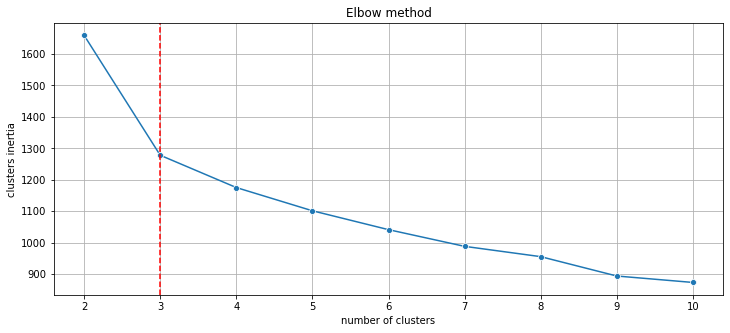

In [18]:
fig, ax = plt.subplots(figsize=(12,5)) # 그래프 크기 지정
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method") 
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

#elbow line을 그렸을 때 3에서 급격하게 꺾이는 것으로 보아 k=3이 적절하다고 볼 수 있다.

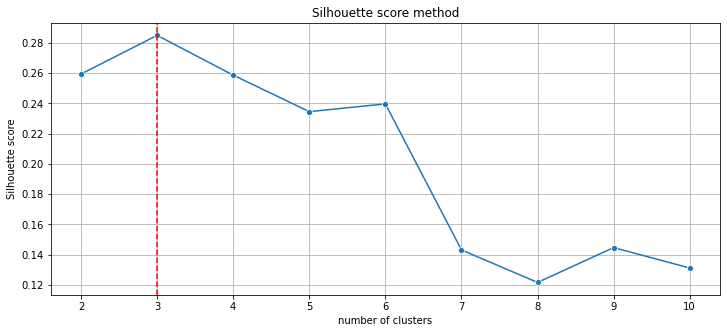

In [19]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

#silhouette score로 확인해도 k=3이 가장 적절하다.

### k=3으로 클러스터링 한 뒤  'Customer_Segment' column 과 비교

In [21]:
# 군집수를 3개로 놓고 Kmeans알고리즘을 돌려보자!
KM_3_clusters = KMeans(n_clusters = 3, init='k-means++').fit(final)
KM_3 = final.copy()
KM_3['Cluster']= KM_3_clusters.labels_ #kmeans를 돌린후의 결과값을 붙인다
KM_3

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,2
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,2
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,2
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,2


In [22]:
# 각 클러스터로 묶인 고객들 수
KM_clust_size = KM_3.groupby('Cluster').size().to_frame()
KM_clust_size.columns = ['Cluster_size']
KM_clust_size

,Cluster_size
Cluster,
0,65
1,62
2,51


In [30]:
result = pd.DataFrame(KM_3['Cluster'])
result['Segment'] = target
result

,Cluster,Segment
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
173,2,3
174,2,3
175,2,3
176,2,3


In [34]:
result.groupby('Segment')['Cluster'].value_counts()

Segment  Cluster
1        1          59
2        0          65
         1           3
         2           3
3        2          48
Name: Cluster, dtype: int64

> segment 1의 와인은 Cluster 1에, segment 2의 와인은 Cluster 0에, segment 3의 와인들은 Cluster 2로 분류되었다.  
6개의 데이터를 제외하고는 모두 잘 분류된 것을 볼 수 있다.

## 1-2) Dbscan

In [35]:
from sklearn.cluster import DBSCAN
from itertools import product
from sklearn.neighbors import NearestNeighbors

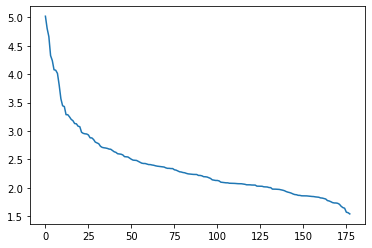

In [36]:
# epsilon의 범위를 지정할때 knn거리를 이용하여 elbow 포인트에서 epsilon 결정한다, (epsilon>=3)
ns = 5
nbrs = NearestNeighbors(n_neighbors=ns).fit(final)
distances, indices = nbrs.kneighbors(final)
distanceDec = sorted(distances[:,ns-1], reverse=True)
plt.plot(indices[:,0], distanceDec)

### 적절한 eps, min samples 찾기

eps 구간은 eps_values = np.arange(2,4.2,0.2) 정도

In [37]:
# 하이퍼파라미터 (epsilon, min_samples)
eps_values = np.arange(2,4.2,0.2)
min_samples = np.arange(3,10)
DBSCAN_params = list(product(eps_values, min_samples)) # 형성한 epsilon과 min_sample들의 조합

In [38]:
num_clust = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(final)
    num_clust.append(len(np.unique(DBS_clustering.labels_)))
    if len(np.unique(DBS_clustering.labels_))==1:
        sil_score.append(0)
    else:
        sil_score.append(silhouette_score(final, DBS_clustering.labels_))

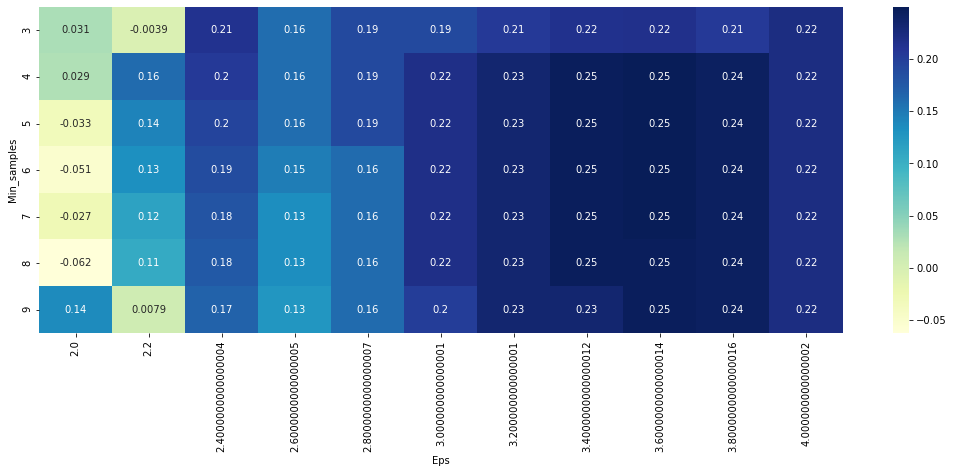

In [39]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

#eps = 3.4~3.6, min_samples = 4~8일 때 siluette 점수가 가장 높게 나왔다.

In [41]:
DBS_clutering = DBSCAN(eps=3.6, min_samples=4).fit(final)

DBS_clustered = final.copy()
DBS_clustered['Cluster'] = DBS_clutering.labels_
DBS_clustered

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,0
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,0
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,0
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,0


In [53]:
DBS_clust_size = DBS_clustered.groupby('Cluster').size().to_frame()
DBS_clust_size.columns = ['Cluster_size']
DBS_clust_size

,Cluster_size
Cluster,
-1,6
0,172


In [54]:
result2 = pd.DataFrame(DBS_clustered['Cluster'])
result2['Segment'] = target
result2.groupby('Segment')['Cluster'].value_counts()

Segment  Cluster
1         0         59
2         0         65
         -1          6
3         0         48
Name: Cluster, dtype: int64

> 대부분의 데이터가 Cluster 0으로 분류되어 DBSCAN으로는 분류가 잘 되지 않는 것을 확인할 수 있다.

## 1-3) Hierarchical 

### 적절한 linkage를 찾아 k=3으로 클러스터링 후  'Customer_Segment' column 과 비교

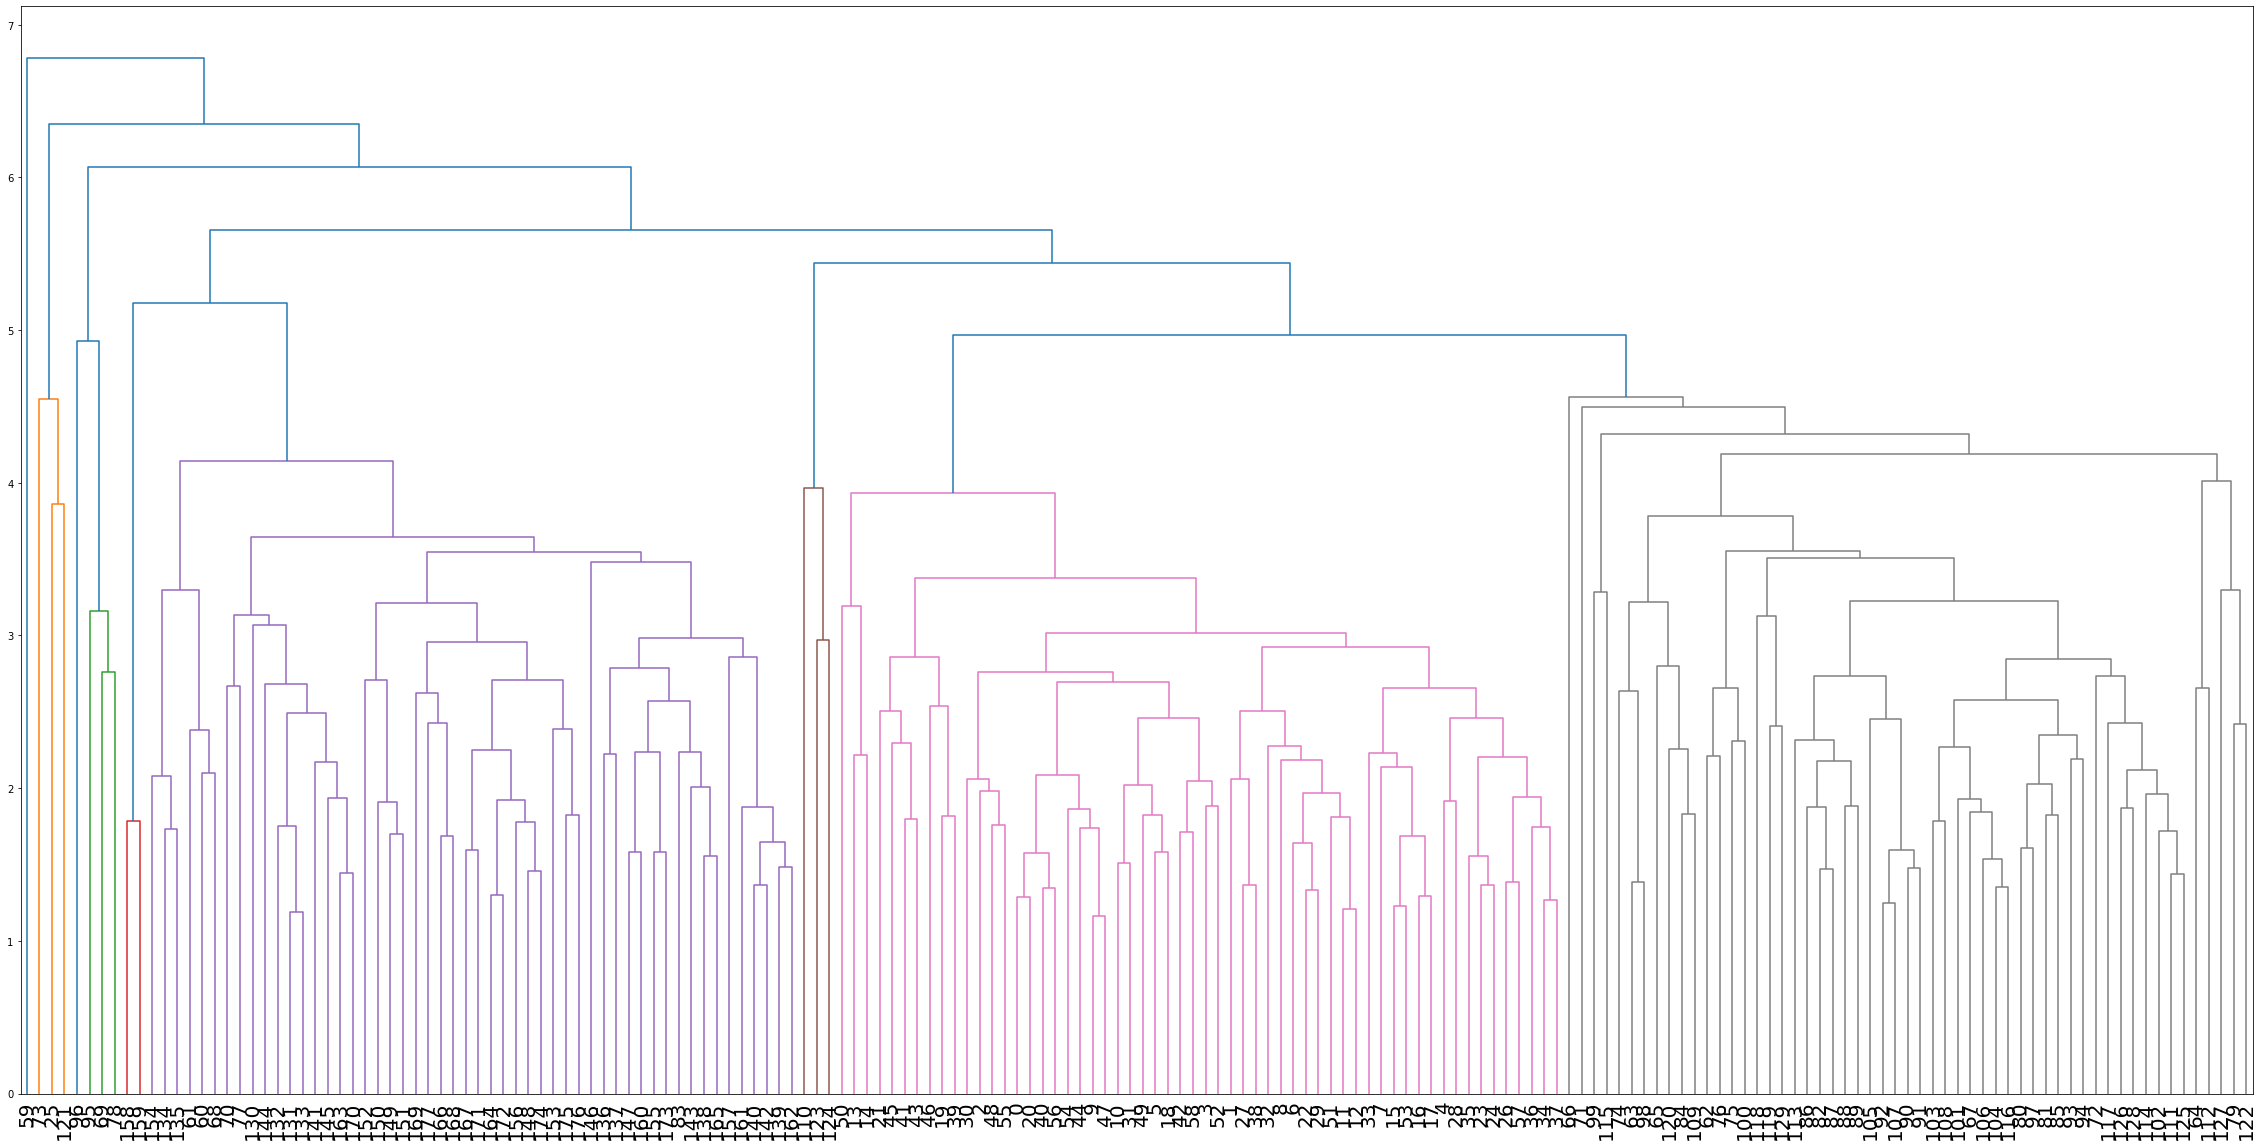

In [65]:
#average 덴드로 그램
from scipy.cluster.hierarchy import linkage, dendrogram

mergings = linkage(final,method= 'average',metric='euclidean')

plt.figure(figsize=(40,20))
dendrogram(mergings,
           labels = None,
           leaf_rotation=90,
           leaf_font_size=20
)

plt.show()

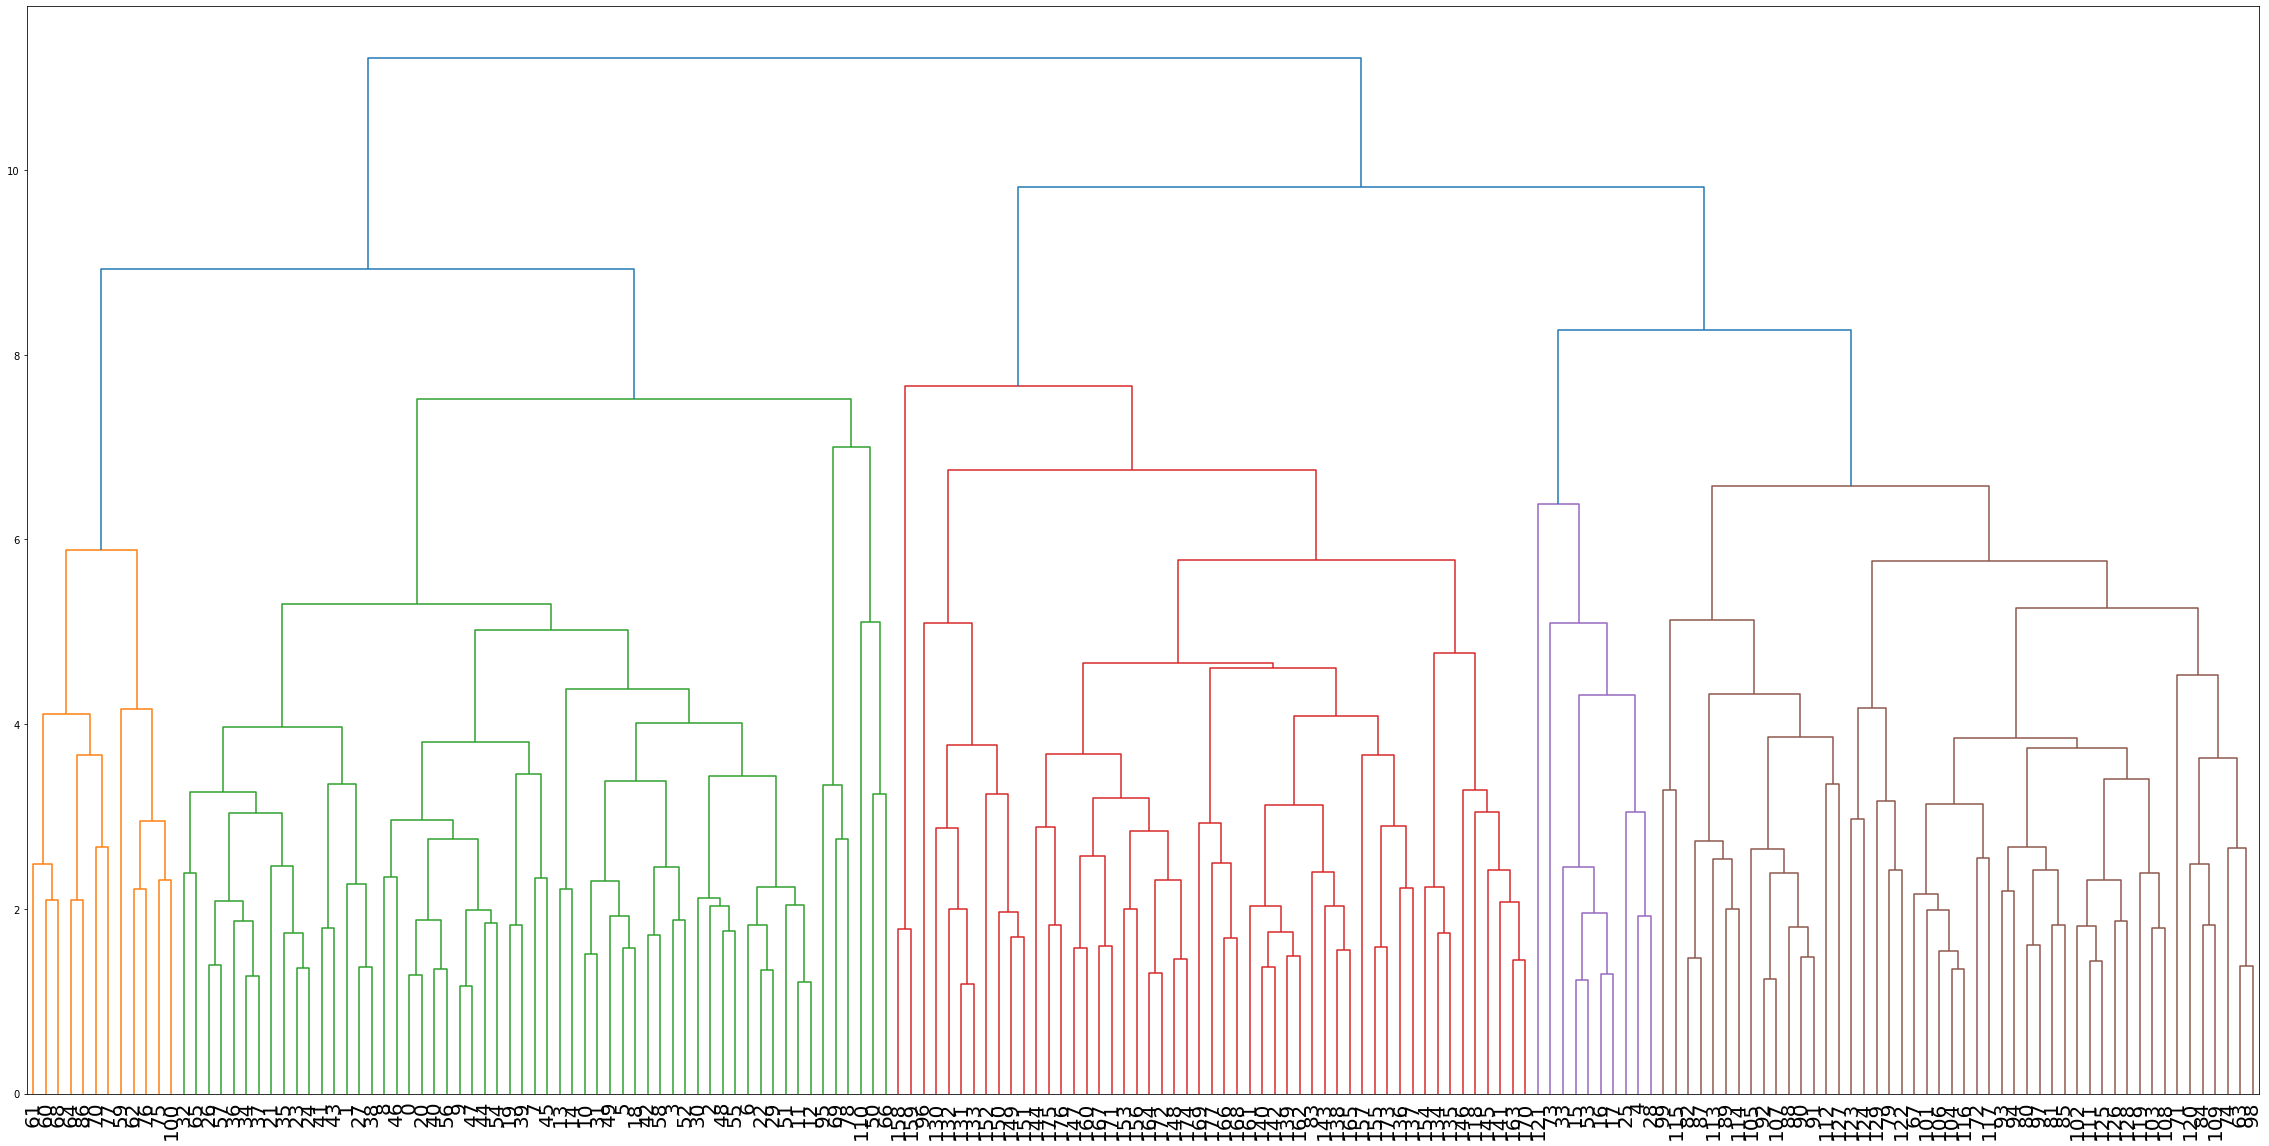

In [66]:
#complete 덴드로 그램
from scipy.cluster.hierarchy import linkage, dendrogram

mergings = linkage(final,method= 'complete',metric='euclidean')

plt.figure(figsize=(40,20))
dendrogram(mergings,
           labels = None,
           leaf_rotation=90,
           leaf_font_size=20
)

plt.show()

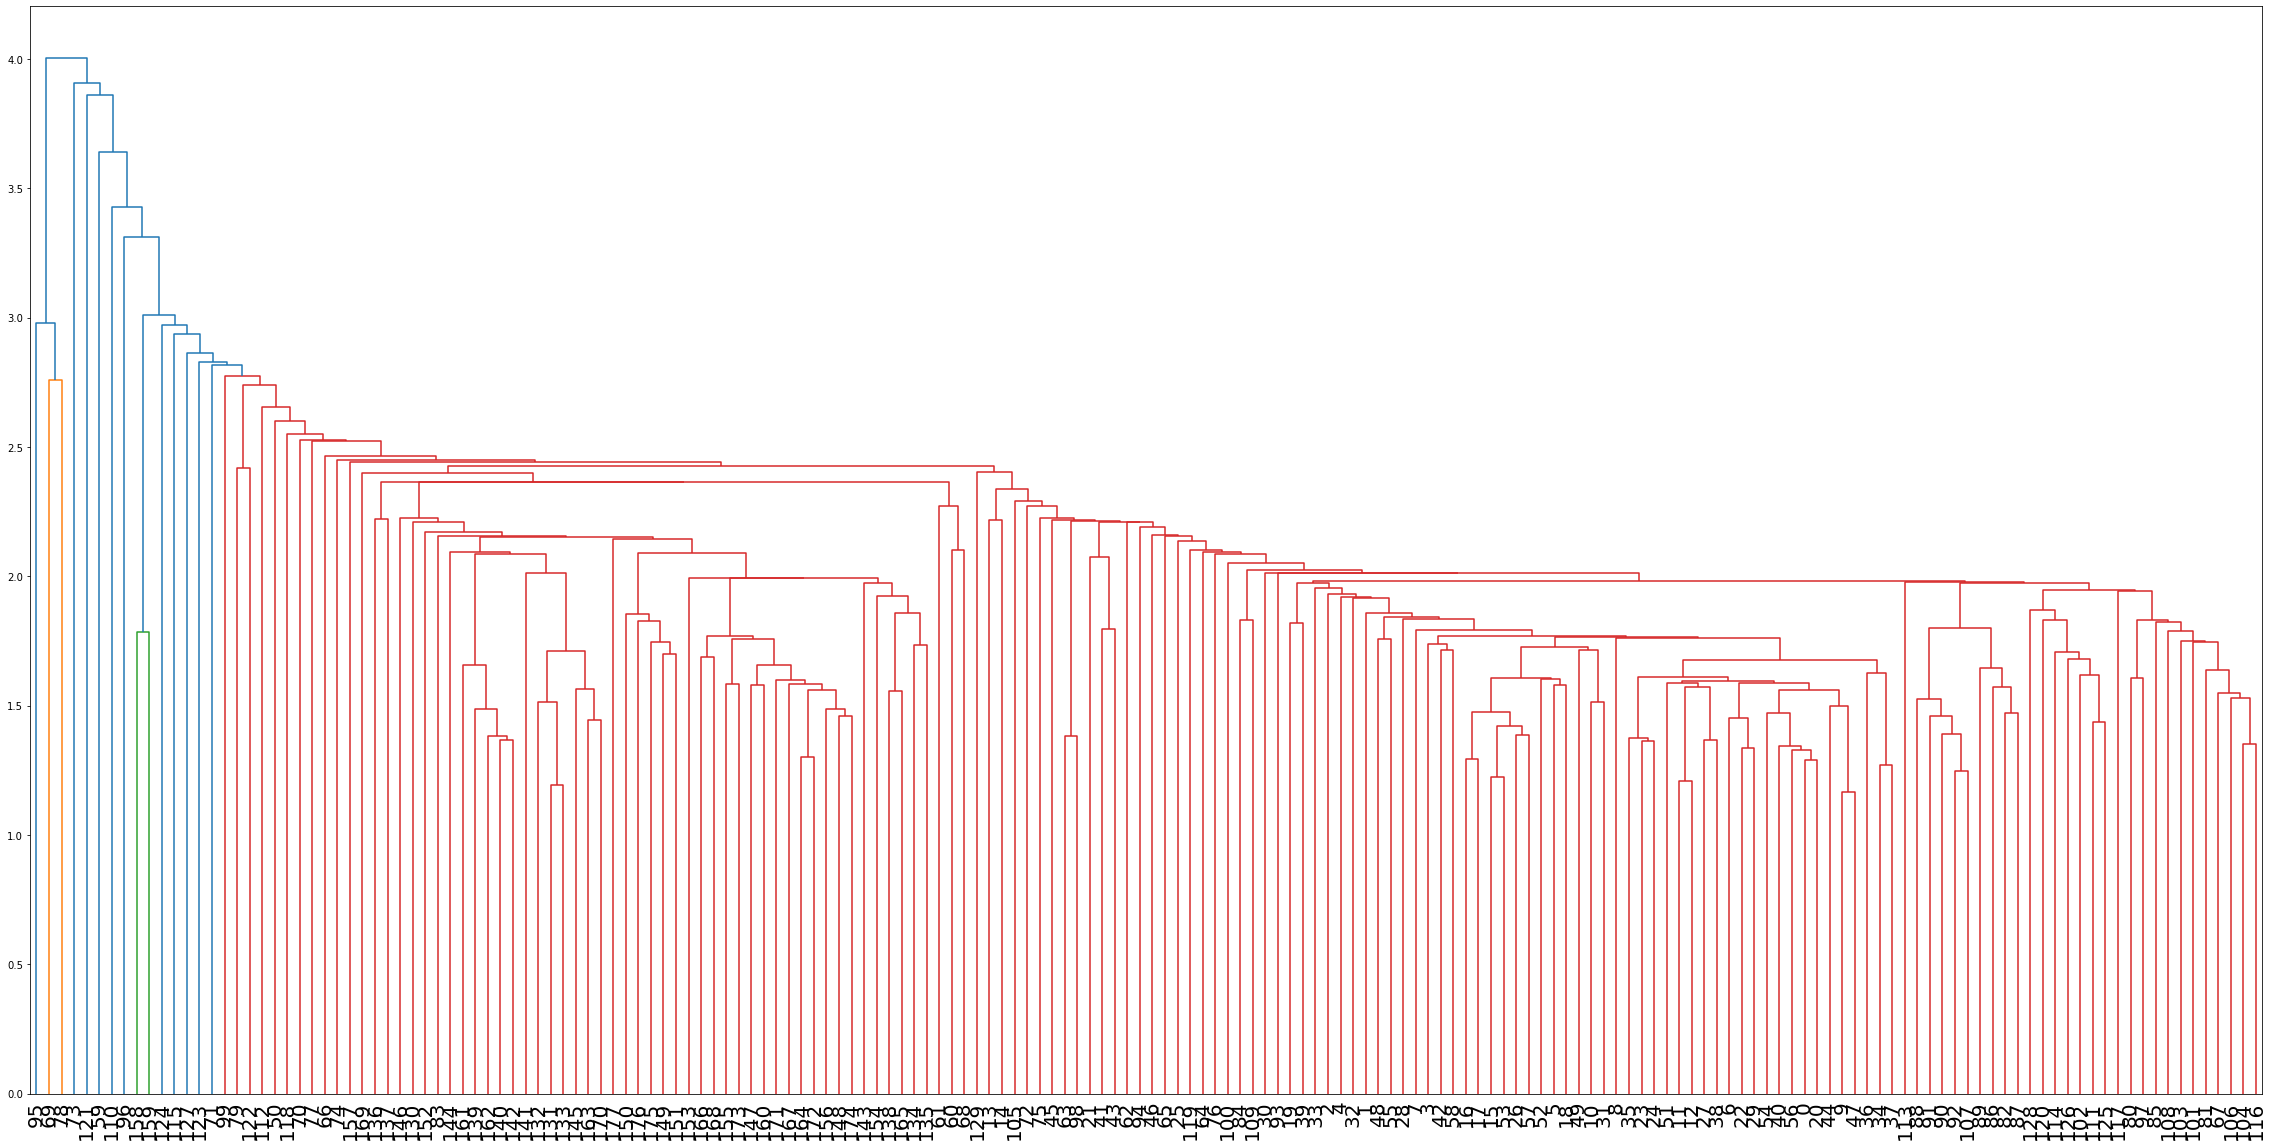

In [67]:
#single 덴드로 그램
from scipy.cluster.hierarchy import linkage, dendrogram

mergings = linkage(final,method= 'single',metric='euclidean')

plt.figure(figsize=(40,20))
dendrogram(mergings,
           labels = None,
           leaf_rotation=90,
           leaf_font_size=20
)

plt.show()

> complete으로 분류하는 것이 가장 적절해 보인다.

In [68]:
#계층적 클러스터링으로 n_clusters개의 클러스터 나누기  (3)
from sklearn.cluster import AgglomerativeClustering

ac_3= AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete') #method =linkage선택, affinity: 거리 척도 선택
label_3=ac_3.fit_predict(final)
label_3

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [71]:
hier_clustered = final.copy()
hier_clustered['Cluster'] = label_3
hier_clustered

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,2
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,2
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,2
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,2


In [72]:
hier_clust_size = hier_clustered.groupby('Cluster').size().to_frame()
hier_clust_size.columns = ['Cluster_size']
hier_clust_size

,Cluster_size
Cluster,
0,69
1,58
2,51


In [73]:
result3 = pd.DataFrame(hier_clustered['Cluster'])
result3['Segment'] = target
result3.groupby('Segment')['Cluster'].value_counts()

Segment  Cluster
1        0          51
         1           8
2        1          50
         0          18
         2           3
3        2          48
Name: Cluster, dtype: int64

> Segment 1, 2, 3은 각각 Cluster 0, 1, 2로 분류되는 것을 알 수 있다. Segment 3에 속하는 데이터는 모두 Cluster2에 속해 잘 분류된 것을 볼 수 있고, 나머지는 잘못 분류된 데이터가 존재하지만 비교적 잘 분류되었다. 

## 1-4) Spectral

### 적절한 affinity로 k=3 클러스터링 후  'Customer_Segment' column 과 비교

In [76]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=3, affinity='rbf',
                          assign_labels='kmeans')

rbf_labels = model.fit_predict(final)

In [77]:
spectral = final.copy()
spectral['rbf'] = rbf_labels

In [78]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors',
                          assign_labels='kmeans')

nn_labels = model.fit_predict(final)

In [79]:
spectral['nn'] = nn_labels

In [81]:
result4 = pd.DataFrame(spectral[['rbf', 'nn']])
result4['Segment'] = target

In [82]:
result4.groupby('Segment')['rbf'].value_counts()

Segment  rbf
1        0      59
2        0      62
         2       6
         1       3
3        2      48
Name: rbf, dtype: int64

In [83]:
result4.groupby('Segment')['nn'].value_counts()

Segment  nn
1        2     59
2        1     64
         2      4
         0      3
3        0     48
Name: nn, dtype: int64

> rbf보다 nearest neighbors로 분류하는 것이 조금 더 성능이 좋았다.

# 2. points data

In [84]:
from sklearn.datasets import make_blobs

## make data

In [93]:
blob_centers = np.array(
    [[0.5,  2.3],
     [-2.3 ,  2],
     [-1.8,  0.5],
     [2,  0.7],
     [-1,  1.3]])
blob_std = np.array([0.2, 0.2, 0.3, 0.15, 0.1])

X_blob, y_blob = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=100)

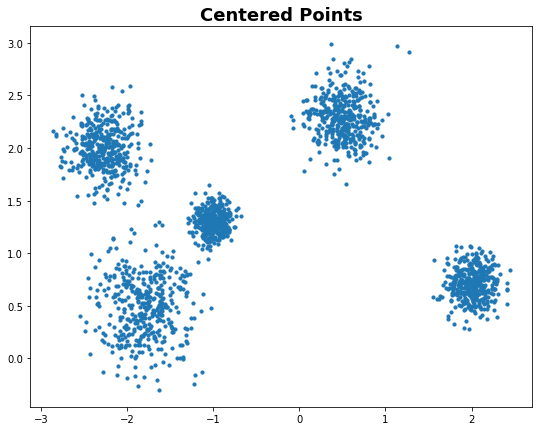

In [94]:
plt.figure(figsize=(9,7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], s=10)
plt.title('Centered Points', fontsize=18, fontweight='demi')
plt.show()

## 2-1) Dbscan

### 적절한 eps, min samples 찾기

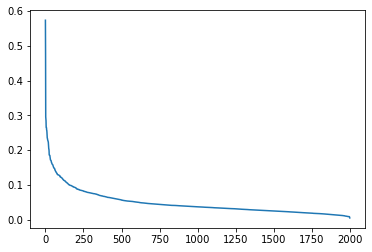

In [95]:
ns = 5
nbrs = NearestNeighbors(n_neighbors=ns).fit(X_blob)
distances, indices = nbrs.kneighbors(X_blob)
distanceDec = sorted(distances[:,ns-1], reverse=True)
plt.plot(indices[:,0], distanceDec)

In [97]:
eps_values = np.arange(0.1, 0.5, 0.05)
min_samples = np.arange(3, 15)
DBSCAN_params = list(product(eps_values, min_samples))

num_clust = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_blob)
    num_clust.append(len(np.unique(DBS_clustering.labels_)))
    if len(np.unique(DBS_clustering.labels_))==1:
        sil_score.append(0)
    else:
        sil_score.append(silhouette_score(X_blob, DBS_clustering.labels_))

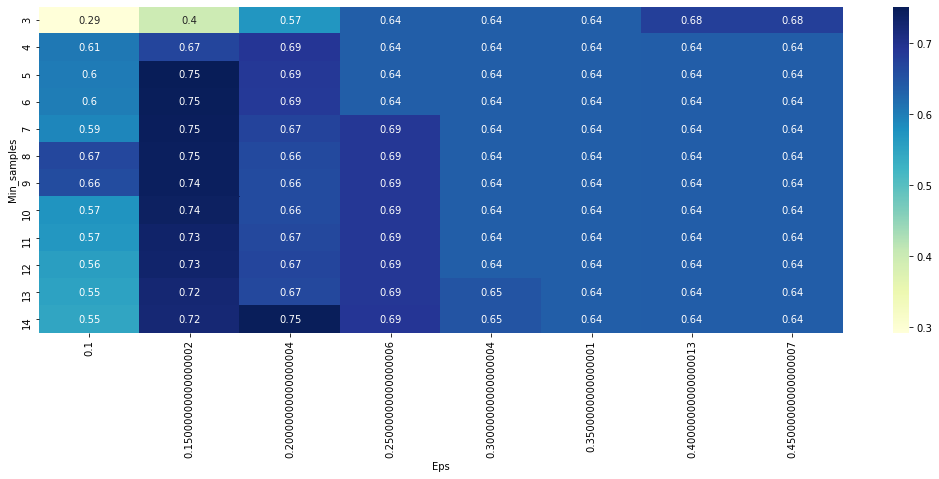

In [98]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

#eps = 0.15, min_samples = 5~7일 때 siluette 점수가 가장 높게 나왔다.

In [100]:
DB_clutering = DBSCAN(eps=0.15, min_samples=7).fit(X_blob)

DB_clustered = pd.DataFrame(X_blob).copy()
DB_clustered['Cluster'] = DB_clutering.labels_

DB_clust_size = DB_clustered.groupby('Cluster').size().to_frame()
DB_clust_size.columns = ['Cluster_size']
DB_clust_size

#-1의 outlier과 5개의 그룹으로 sort되었다.

,Cluster_size
Cluster,
-1,34
0,400
1,394
2,398
3,404
4,370


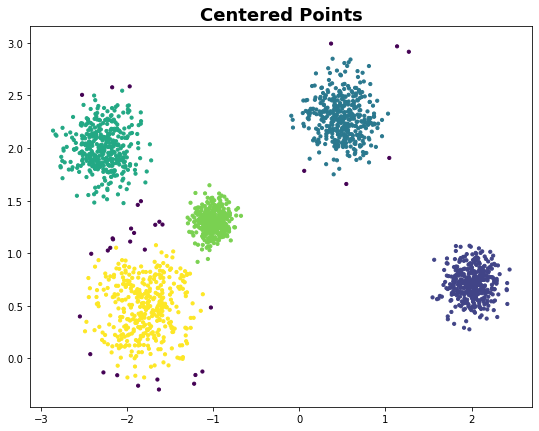

In [101]:
#결과 시각화
plt.figure(figsize=(9,7))
plt.scatter(DB_clustered[0], DB_clustered[1], c=DB_clustered['Cluster'], s=10)
plt.title('Centered Points', fontsize=18, fontweight='demi')
plt.show()

> Outlier로 분류된 -1의 34개의 원소 빼고는 잘 분류된 것을 볼 수 있다.

## 2-2)  Spectral

In [108]:
#rbf로 먼저 clustering 해본다

from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=5, affinity='rbf',
                          assign_labels='kmeans')

labelsS = model.fit_predict(X_blob)

In [109]:
rbf = pd.DataFrame(X_blob).copy()
rbf['Cluster'] = labelsS

rbf_clust_size = rbf.groupby('Cluster').size().to_frame()
rbf_clust_size.columns = ['Cluster_size']
rbf_clust_size

,Cluster_size
Cluster,
0,400
1,426
2,400
3,404
4,370


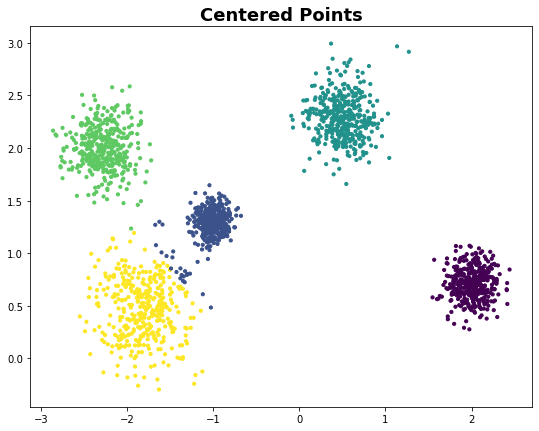

In [110]:
#결과 시각화
plt.figure(figsize=(9,7))
plt.title('Centered Points', fontsize=18, fontweight='demi')
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=labelsS, s=10)

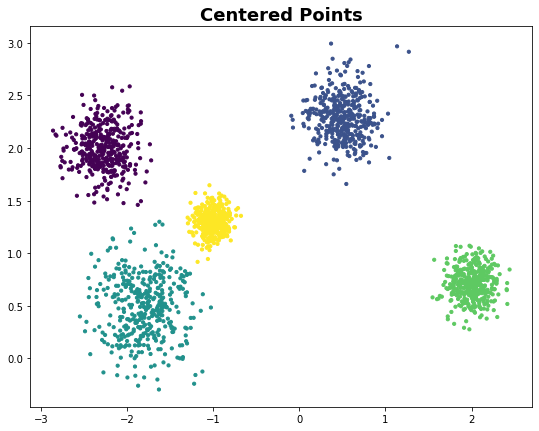

In [113]:
#nearest neighbors로 clustering하는 것이 더 깔끔하게 분류된다.
import warnings
warnings.filterwarnings("ignore") 

from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=5, affinity='nearest_neighbors',
                          assign_labels='kmeans')
labelsS = model.fit_predict(X_blob)

plt.figure(figsize=(9,7))
plt.title('Centered Points', fontsize=18, fontweight='demi')
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=labelsS,s=10)